### Early Detection of Alzheimer's Disease using CNN Model

#### Group Members:

1. Hari Priya Avarampalayam Manoharan 
2. Rida Fathima 
3. Subramanian Arumugam
4. Agash Sekar
5. Abinesh G



In [15]:
#Importing Modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from skimage import feature

In [2]:
#Verifying for missing values

sets=[r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\MildDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\ModerateDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\VeryMildDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\NonDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\MildDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\ModerateDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\VeryMildDemented",
     r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\NonDemented"]
print(sets)
missing_values=[]
for i in sets:
    dataset_path = i
    print(i)
    for filename in os.listdir(dataset_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(dataset_path, filename)
            image = np.array(Image.open(image_path))
            if np.isnan(np.sum(image)):
                missing_values.append(filename)

["C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\train\\MildDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\train\\ModerateDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\train\\VeryMildDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\train\\NonDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\test\\MildDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\test\\ModerateDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\test\\VeryMildDemented", "C:\\Users\\Rida\\Downloads\\Alzeimer's_Data\\Alzheimer_s Dataset\\test\\NonDemented"]
C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\MildDemented
C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\ModerateDemented
C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train\VeryMildDemented
C:\Users\Rida\Downloads\Alzeimer

In [38]:
# checking if there are any missing values or not
missing_values

#the empty list shows that there are no missing values

[]

In [4]:
#image display
def show_image(path):
    dir_lst=os.listdir(path)
    plt.figure(figsize=(14,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        picture = plt.imread(os.path.join(path,dir_lst[i]))
        plt.imshow(picture,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

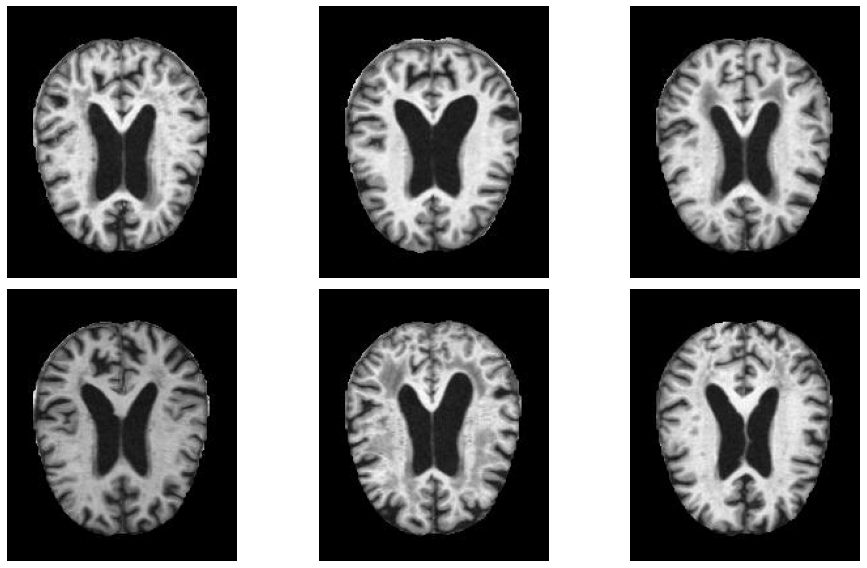

In [5]:
#Display Mild Demented MRI Images
MildDemented= r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\MildDemented"
show_image(MildDemented)

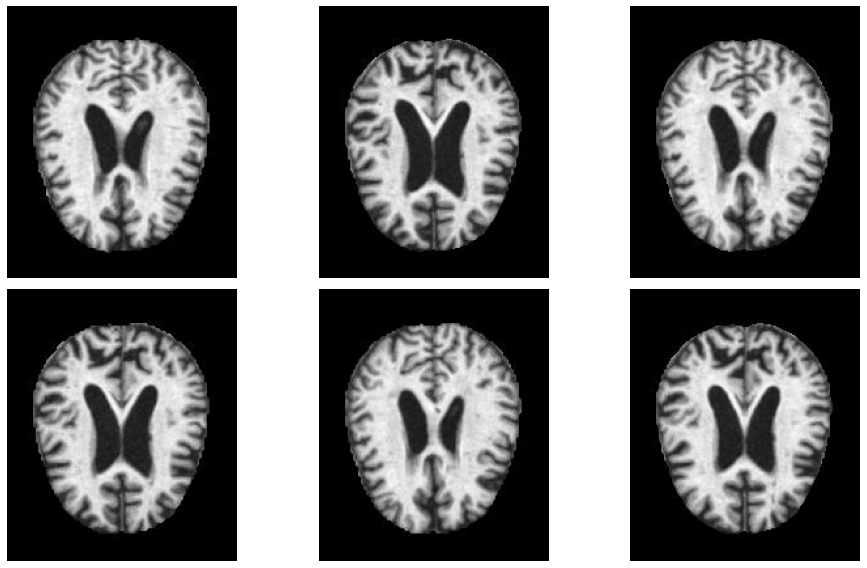

In [6]:
#display moderate Demented MRI image
ModerateDemented = r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\ModerateDemented"
show_image(ModerateDemented)

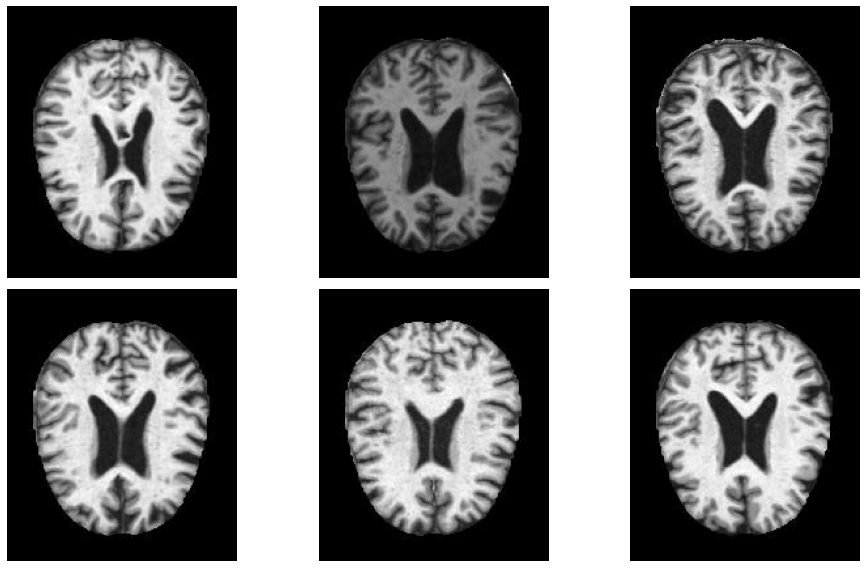

In [7]:
#display very mild Demented MRI image
VeryMildDemented =  r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\VeryMildDemented"
show_image(VeryMildDemented)

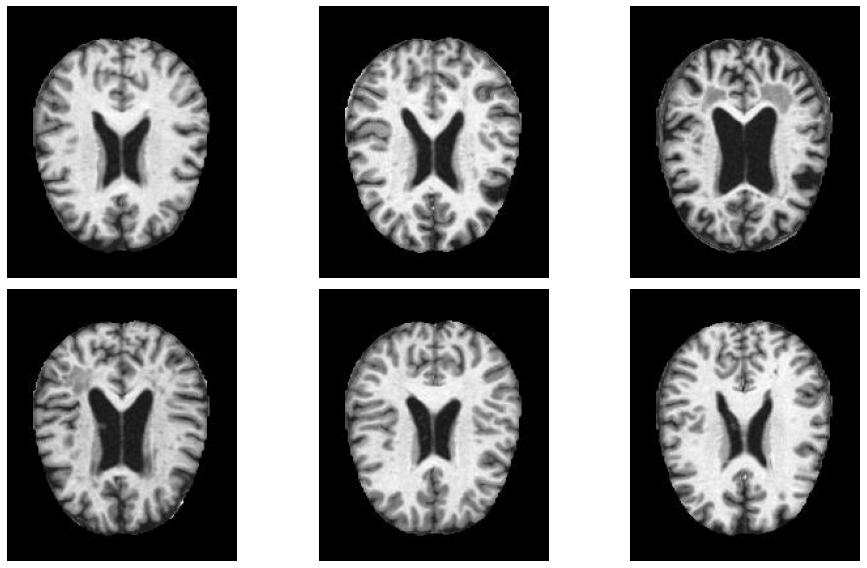

In [8]:
#display Nondemented MRI image
NonDemented = r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test\NonDemented"
show_image(NonDemented)

In [9]:
#image preprocessing for training and test
train = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\train",validation_split=.2,subset='training',
                                                           seed=1337,image_size=[150,150],batch_size=64)

test = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\Rida\Downloads\Alzeimer's_Data\Alzheimer_s Dataset\test",validation_split=.2,subset='validation',
                                                                 seed=1337,image_size=[150,150],batch_size=64)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 1279 files belonging to 4 classes.
Using 255 files for validation.


In [10]:
#defining labels for test and train
train.class_names=['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
test.class_names=['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [11]:
#one hot encoding for labels
from tensorflow.data.experimental import AUTOTUNE
def one_hot_label(image, label):
    label = tf.one_hot(label, 4)
    return image, label

train=train.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test=test.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [16]:
# Function to extract HOG features from an image
def extract_hog_features(image, channel_axis=-1):
    hog_features, hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), block_norm='L2-Hys',
                                          visualize=True, multichannel=True, channel_axis=channel_axis)
    return hog_features.astype(np.float32), hog_image

In [17]:
##feature extraction using HOG

#Extract HOG features from images in train and test datasets
train_hog = []
train_labels = []
test_hog = []
test_labels = []

for imgs, lbl in train:
    hog = [extract_hog_features(img.numpy()) for img in imgs]
    train_hog.extend(hog)
    train_labels.extend(lbl.numpy())
train_hog = np.asarray(train_hog)
train_labels = np.asarray(train_labels)
for imgs, lbl in test:
    hog = [extract_hog_features(img.numpy()) for img in imgs]
    test_hog.extend(hog)
    test_labels.extend(lbl.numpy())
test_hog = np.asarray(test_hog)
test_labels = np.asarray(test_labels)

# Print the shapes of the HOG feature vectors and labels
print("Train HOG feature vector shape:", train_hog.shape)
print("Train labels shape:", train_labels.shape)
print("Test HOG feature vector shape:", test_hog.shape)
print("Test labels shape:", test_labels.shape)


C:\Users\Rida\AppData\Local\Temp\ipykernel_19316\3746353922.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
C:\Users\Rida\AppData\Local\Temp\ipykernel_19316\1969835928.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_hog = np.asarray(train_hog)


Train HOG feature vector shape: (4097, 2)
Train labels shape: (4097, 4)
Test HOG feature vector shape: (255, 2)
Test labels shape: (255, 4)


C:\Users\Rida\AppData\Local\Temp\ipykernel_19316\1969835928.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_hog = np.asarray(test_hog)


C:\Users\Rida\AppData\Local\Temp\ipykernel_19316\3746353922.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),


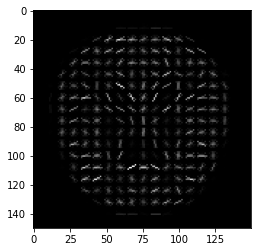

In [19]:
import matplotlib.pyplot as plt

#select a sample image from training
sample_img = train.take(1)
sample_img = list(sample_img.as_numpy_iterator())[0][0][0]
#extract HOG features and image
hog_features, hog_image = extract_hog_features(sample_img)
# visualize the important feature
plt.imshow(hog_image, cmap='gray')
plt.show()


In [20]:
#to make the dataset efficient

train = train.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:

##constructing cnn model

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.SeparableConv2D(32,3,activation='relu', padding='same'))
cnn_model.add(layers.SeparableConv2D(32,3,activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [22]:
cnn_model.add(layers.SeparableConv2D(64,3,activation='relu', padding='same'))
cnn_model.add(layers.SeparableConv2D(64,3,activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [23]:
cnn_model.add(layers.SeparableConv2D(128,3,activation='relu', padding='same'))
cnn_model.add(layers.SeparableConv2D(128,3,activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [24]:
cnn_model.add(layers.SeparableConv2D(256,3,activation='relu', padding='same'))
cnn_model.add(layers.SeparableConv2D(256,3,activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Flatten())
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [25]:
cnn_model.add(layers.Dense(512,activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.7))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [26]:
cnn_model.add(layers.Dense(128,activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [27]:
cnn_model.add(layers.Dense(64,activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(4, activation='softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 73, 73, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 73, 73, 32)       1344      
 leConv2D)                                                       
                                                        

In [28]:
#defining metrics
val_metrics = [tf.keras.metrics.AUC(name='auc')]
cnn_model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=val_metrics
    )

In [29]:
#validating 
history = cnn_model.fit(
   train,validation_data=test,epochs=7
)

Epoch 1/7
65/65 [==============================] - 129s 2s/step - loss: 1.7791 - auc: 0.5853 - val_loss: 1.2572 - val_auc: 0.7281
Epoch 2/7
65/65 [==============================] - 129s 2s/step - loss: 1.3688 - auc: 0.7024 - val_loss: 1.2107 - val_auc: 0.7281
Epoch 3/7
65/65 [==============================] - 135s 2s/step - loss: 1.1795 - auc: 0.7615 - val_loss: 1.2301 - val_auc: 0.7281
Epoch 4/7
65/65 [==============================] - 117s 2s/step - loss: 1.0811 - auc: 0.7927 - val_loss: 1.1121 - val_auc: 0.7326
Epoch 5/7
65/65 [==============================] - 122s 2s/step - loss: 1.0375 - auc: 0.8099 - val_loss: 1.0419 - val_auc: 0.7478
Epoch 6/7
65/65 [==============================] - 129s 2s/step - loss: 0.9863 - auc: 0.8245 - val_loss: 1.0822 - val_auc: 0.7507
Epoch 7/7
65/65 [==============================] - 129s 2s/step - loss: 0.9569 - auc: 0.8330 - val_loss: 1.1829 - val_auc: 0.7660


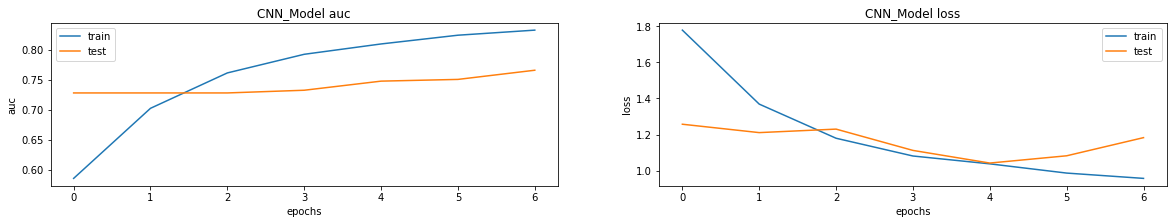

In [30]:
#plotting the graph
fig, axis = plt.subplots(1, 2, figsize=(20, 3))
axis = axis.ravel()
for i, j in enumerate(['auc', 'loss']):
    axis[i].plot(history.history[j])
    axis[i].plot(history.history['val_' + j])
    axis[i].set_title('CNN_Model {}'.format(j))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(j)
    axis[i].legend(['train', 'test'])

In [36]:
# evaluating for training accuracy
train_loss, train_acc = cnn_model.evaluate(train)
print('Train accuracy:', train_acc)

65/65 [==============================] - 32s 490ms/step - loss: 1.2128 - auc: 0.7769
Train accuracy: 0.7768656015396118


In [33]:
# evaluating for testing accuracy
test_loss, test_acc = cnn_model.evaluate(test)
print('Test accuracy:', test_acc)

4/4 [==============================] - 2s 525ms/step - loss: 1.1829 - auc: 0.7660
Test accuracy: 0.7660361528396606


In [19]:
#validating
history = cnn_model.fit(
   train,validation_data=validation,epochs=50
)

Epoch 1/50
65/65 [==============================] - 125s 2s/step - loss: 1.6607 - auc: 0.6107 - val_loss: 1.2016 - val_auc: 0.8092
Epoch 2/50
65/65 [==============================] - 113s 2s/step - loss: 1.3017 - auc: 0.7168 - val_loss: 1.1332 - val_auc: 0.8092
Epoch 3/50
65/65 [==============================] - 112s 2s/step - loss: 1.1154 - auc: 0.7848 - val_loss: 1.2693 - val_auc: 0.7284
Epoch 4/50
65/65 [==============================] - 113s 2s/step - loss: 1.0284 - auc: 0.8143 - val_loss: 1.3092 - val_auc: 0.7300
Epoch 5/50
65/65 [==============================] - 113s 2s/step - loss: 0.9620 - auc: 0.8353 - val_loss: 1.3425 - val_auc: 0.7494
Epoch 6/50
65/65 [==============================] - 123s 2s/step - loss: 0.9245 - auc: 0.8463 - val_loss: 1.7040 - val_auc: 0.7521
Epoch 7/50
65/65 [==============================] - 114s 2s/step - loss: 0.8534 - auc: 0.8684 - val_loss: 1.6963 - val_auc: 0.7627
Epoch 8/50
65/65 [==============================] - 103s 2s/step - loss: 0.8212 - a

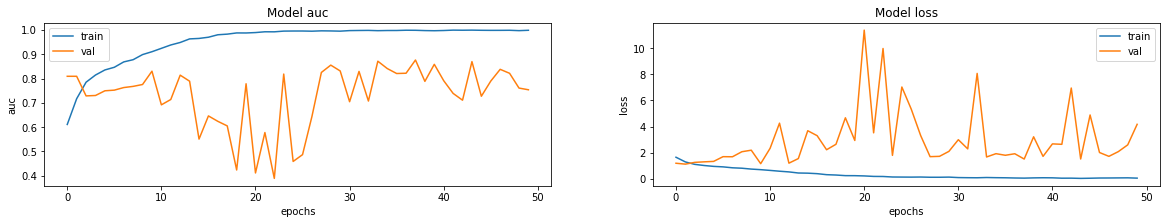

In [20]:
#plotting the graph
fig, axis = plt.subplots(1, 2, figsize=(20, 3))
axis = axis.ravel()
for i, j in enumerate(['auc', 'loss']):
    axis[i].plot(history.history[j])
    axis[i].plot(history.history['val_' + j])
    axis[i].set_title('CNN_Model {}'.format(j))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(j)
    axis[i].legend(['train', 'test'])

In [29]:
#evaluating for training accuracy
train_loss, train_acc = model.evaluate(train)
print('Test accuracy:', train_acc)

65/65 [==============================] - 29s 440ms/step - loss: 1.3269 - auc: 0.8983
Test accuracy: 0.8983156681060791


In [27]:
#evaluating for testing accuacy
test_loss, test_acc = cnn_model.evaluate(test)
print('Test accuracy:', test_acc)

4/4 [==============================] - 2s 443ms/step - loss: 4.1771 - auc: 0.7536
Test accuracy: 0.7536409497261047
